In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read in the data
data = pd.read_sql_table('features', 'sqlite:///../data/disaster_response.db')

data.shape

(26216, 40)

### Let's analyze the training set and classified messages

In [4]:
# create dataframe with labels and their counts
analyze_labels = (
                data.agg({col: 'sum' for col in data.columns[4:]})
                .to_frame()
                .rename_axis('label')
                .rename(columns={0: 'count'})
                .reset_index()
                .sort_values('count', ascending=False)
                .reset_index(drop=True)
                )

# show rate of response
analyze_labels['rate'] = analyze_labels['count'] / data.shape[0]

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='label', y='rate', data=analyze_labels, ax=ax)


,label,count,rate
0,related,20282,0.773650
1,aid_related,10860,0.414251
2,weather_related,7297,0.278341
3,direct_report,5075,0.193584
4,request,4474,0.170659
5,other_aid,3446,0.131446
6,food,2923,0.111497
7,earthquake,2455,0.093645
8,storm,2443,0.093187
9,shelter,2314,0.088267


Text(-90.04166666666667, 0.5, '')

/Users/danherman/miniconda3/envs/dev/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/danherman/miniconda3/envs/dev/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/danherman/miniconda3/envs/dev/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/danherman/miniconda3/envs/dev/lib/python3.11/site-pa

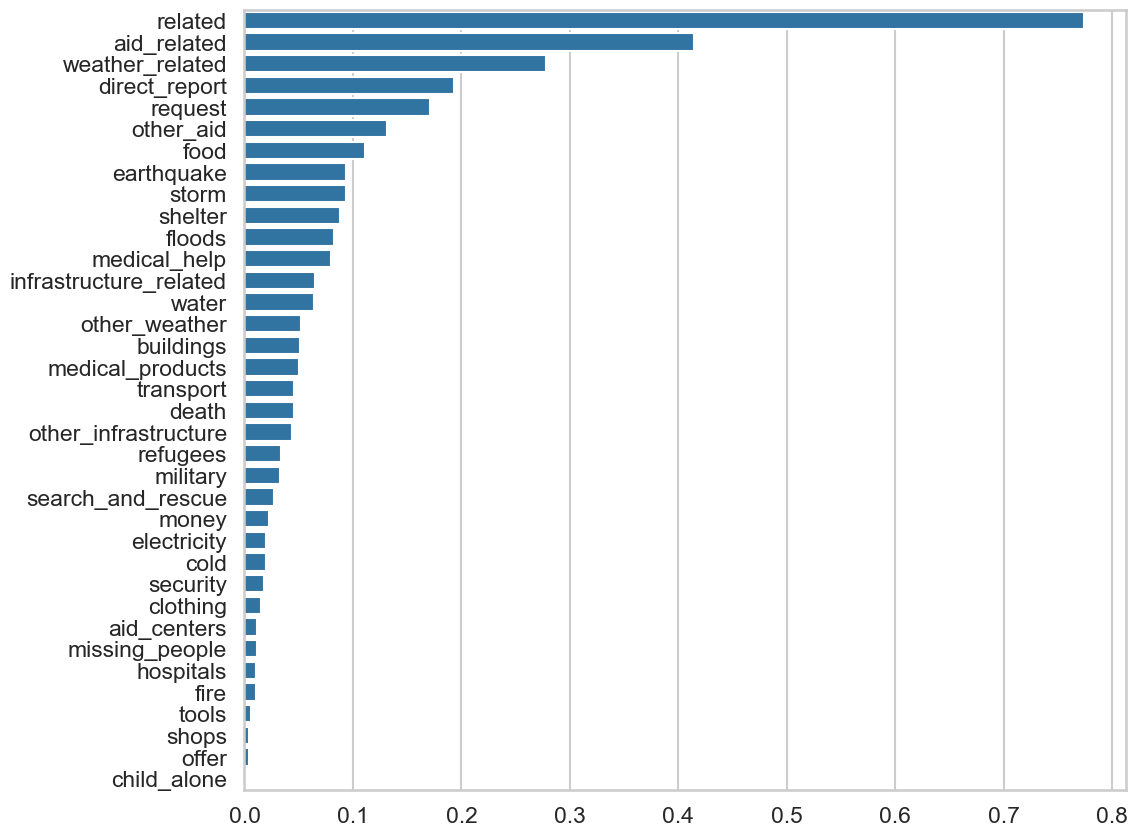

In [30]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x='rate', y='label', data=analyze_labels, ax=ax)

plt.yticks(rotation=0, ha='right')  # adjust rotation and alignment here
plt.tight_layout()  # adjust subplot params so that subplot fits into the figure area
plt.xlabel('')
plt.ylabel('')